In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [26]:
ft = 10000
local_path = f'/storage/shared/oceanparcels/output_data/data_Claudio/hc13_3/hc13_400.zarr'

In [27]:
sim = xr.open_zarr(local_path)

In [28]:
sim = sim.compute()

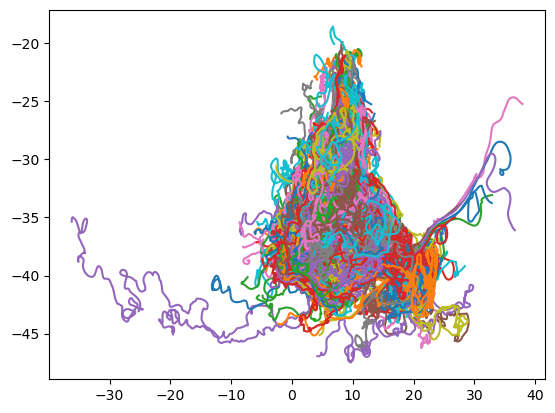

In [29]:
for i in range(1000):
    plt.plot(sim['lon'][i,:], sim['lat'][i,:])

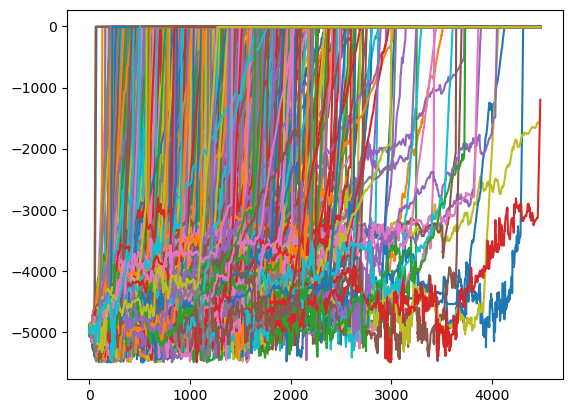

In [30]:
for i in range(1000):
    plt.plot(- sim['z'][i,:])

In [7]:
sim

<xarray.Dataset>
Dimensions:           (trajectory: 8192, obs: 4500)
Coordinates:
  * obs               (obs) int32 0 1 2 3 4 5 ... 4494 4495 4496 4497 4498 4499
  * trajectory        (trajectory) int64 0 1 2 3 4 ... 8187 8188 8189 8190 8191
Data variables: (12/20)
    abs_salinity      (trajectory, obs) float32 34.75 34.75 34.75 ... nan nan
    bottom            (trajectory, obs) float32 5.5e+03 5.5e+03 ... nan nan
    cons_temperature  (trajectory, obs) float32 0.755 0.7429 0.7481 ... nan nan
    density           (trajectory, obs) float32 1.028e+03 1.028e+03 ... nan nan
    distance          (trajectory, obs) float32 51.0 51.0 51.0 ... nan nan nan
    floored           (trajectory, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan
    ...                ...
    u                 (trajectory, obs) float32 0.0 3.982e-07 ... nan nan
    v                 (trajectory, obs) float32 0.0 -4.395e-07 ... nan nan
    v_s               (trajectory, obs) float32 8.861e-08 8.861e-08 ... nan nan
    w                 (trajectory, obs) float32 0.0 -0.0002631 ... nan nan
    z                 (trajectory, obs) float64 5e+03 5.018e+03 ... nan nan
    z_kz              (trajectory, obs) float32 0.0 0.3122 -0.7171 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.4.2-148-gb7738e92

In [24]:
sim = xr.open_zarr(local_path)
sim = sim.where(sim.radius < 1e-6, drop=False)

depths = sim['z'].values

k1, k2 = np.where(depths < 150)
idx_particles, idx_k2 = np.unique(k1, return_index=True)
surface_time = k2[idx_k2]


Text(0, 0.5, 'Particle Depth [m]')

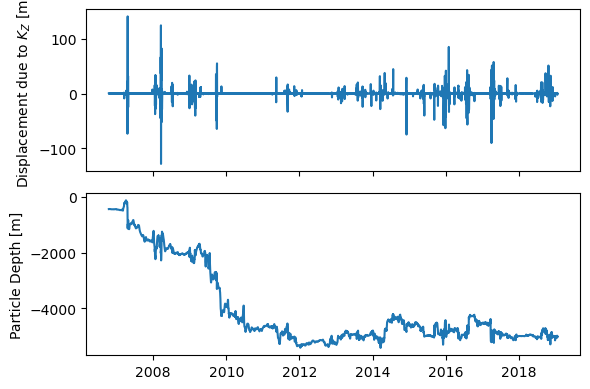

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(6, 4), sharex=True, tight_layout=True)

for i in idx_particles:
    ax[0].plot(sim['time'][i, :], sim['z_kz'][i, :], label=i)
    ax[1].plot(sim['time'][i, :], -sim['z'][i, :], label=i)
    
ax[0].set_ylabel(r'Displacement due to $K_Z$ [m]')
ax[1].set_ylabel(r'Particle Depth [m]')